# *Section1 Project*
---
게임 회사에 합류하여 다음 분기의 게임을 설계하기로 하였다.
어떤 게임을 설계하면 좋을까?

Project Contents
- **Part0. Introduction** <br/>
- **Part1. Import Data** <br/>
- **Part2. Data Preprocessing** <br/>
- **Part3. Visualization** <br/>
---

## **Part 0. Introduction**

다음 분기에 어떤 게임을 설계해야 할까를 정하는 과정과 그 결과를 보여주는 것을 목표로 하여 데이터셋을 읽는 것부터, 결론을 도출하는 과정을 정리하는 것이 이 프로젝트의 목적이다. 이 발표를 듣는 사람은 비데이터 직군이라는 가정 하에 준비하여야 한다.



**1. 지역에 따라서 선호하는 게임 장르가 다를까?**
- 지역은 어떻게 구분했나요? <br/>
- 지역별로 선호하는 게임의 장르를 파악했나요? <br/>
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요? <br/>


**2. 연도별 게임의 트렌드가 있을까?**
- 트렌드는 어떤 것을 기준으로 파악했나요? <br/>
- 연도별로 트렌드가 존재하나요? <br/>
- 왜 존재한다/존재하지 않는다고 생각했나요? <br/>

**3. 인기가 많은 게임에 대한 분석 및 시각화 프로세스**
- 인기가 많다는 것을 어떻게 정의했나요? <br/>
- 해당 게임이 왜 인기가 많다고 생각했나요? <br/>
- 시각화를 통해 무엇을 나타내고자 하는지를 고려했나요? <br/>
- 해당 분석을 통해 어떤 인사이트를 도출할 수 있나요? <br/>

**4. 다음 분기에 어떤 게임을 설계해야 하는지에 대한 결론**


---

## **Part 1. Import Data**

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [211]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2 (7).csv


In [212]:
vgames = pd.read_csv('vgames2.csv')

In [213]:
vgames.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


**Data Description**

* Name : 게임 이름
* Platform : 게임 지원 플렛폼
* Year : 출시 연도
* Genre : 게임 장르
* Publisher : 게임 배급 회사
* NA_Sales : 북미지역 출고량
* EU_Sales : 유럽지역 출고량
* JP_Sales : 일본지역 출고량
* Other_Sales : 기타지역 출고량



---

## **Part 2. Data Preprocessing**

In [214]:
vgames.shape

(16598, 10)

In [215]:
vgames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [216]:
vgames.duplicated().sum()

0

In [217]:
print(vgames.isnull().sum())

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


In [218]:
#결측치 값을 대체하였을 때, 이상치가 많이 생길 듯 하여 다 제거해주었다
#데이터 양에 비해 결측치 비율이 적기 때문에 결론을 도출하는데 큰 이슈가 되진 않을 듯 하였다
vgames = vgames.dropna(axis=0)

In [219]:
print(vgames.isnull().sum())

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [220]:
vgames.shape

(16241, 10)

In [221]:
vgames['Year'].value_counts()

2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
          ... 
13.0         2
12.0         2
86.0         1
2020.0       1
94.0         1
Name: Year, Length: 62, dtype: int64

In [222]:
vgames['Genre'].value_counts()

Action          3240
Sports          2299
Misc            1681
Role-Playing    1465
Shooter         1280
Adventure       1268
Racing          1219
Platform         873
Simulation       846
Fighting         835
Strategy         669
Puzzle           566
Name: Genre, dtype: int64

In [223]:
vgames = vgames.drop(['Unnamed: 0'], axis=1)

In [242]:
vgames.drop(vgames[(vgames['Year'] >2016) & (vgames['Year'] <100)].index, inplace=True)
vgames

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [244]:
vgames_idx1 = vgames[vgames['Year']==2017].index
vgames_idx2 = vgames[vgames['Year']==2020].index
vgames_idx3 = vgames[vgames['Year']<1980].index
vgames = vgames.drop(vgames_idx1)
vgames = vgames.drop(vgames_idx2)
vgames = vgames.drop(vgames_idx3)

In [229]:
vgames['NA_Sales'] = vgames['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
vgames['EU_Sales'] = vgames['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
vgames['JP_Sales'] = vgames['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
vgames['Other_Sales'] = vgames['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)


In [230]:
vgames['Sales_sum'] = vgames['NA_Sales']+vgames['EU_Sales']+vgames['JP_Sales']+vgames['Other_Sales']

## **Part 3. Visualization**

In [231]:
Genre_NA = vgames.groupby(['Genre'])['NA_Sales'].sum()
Genre_EU = vgames.groupby(['Genre'])['EU_Sales'].sum()
Genre_JP = vgames.groupby(['Genre'])['JP_Sales'].sum()
Genre_Other = vgames.groupby(['Genre'])['Other_Sales'].sum()

In [232]:
Genre_NA

Genre
Action          858.75
Adventure       101.79
Fighting        220.35
Misc            394.73
Platform        445.38
Puzzle          121.58
Racing          354.70
Role-Playing    318.76
Shooter         574.48
Simulation      181.43
Sports          667.26
Strategy         67.83
Name: NA_Sales, dtype: float64

In [233]:
Genre_all = pd.DataFrame()
Genre_all = Genre_all.append(Genre_NA)
Genre_all = Genre_all.append(Genre_EU)
Genre_all = Genre_all.append(Genre_JP)
Genre_all = Genre_all.append(Genre_Other)
Genre_all = Genre_all.T
Genre_all

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86
Simulation,181.43,112.99,63.54,31.32


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


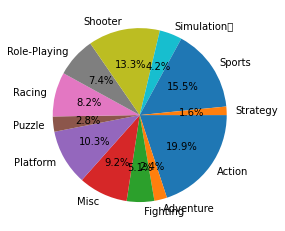

In [234]:
labels = ['Action', 'Adventure',' Fighting', 'Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation	','Sports','Strategy']

colors = sns.color_palette()

plt.pie(Genre_NA,labels=labels, autopct='%.1f%%',startangle=360,counterclock=False)
plt.show()

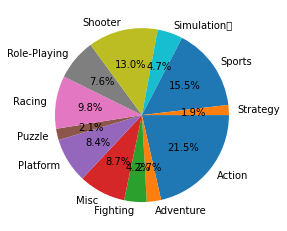

In [235]:
labels = ['Action', 'Adventure',' Fighting', 'Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation	','Sports','Strategy']

colors = sns.color_palette()

plt.pie(Genre_EU,labels=labels, autopct='%.1f%%',startangle=360,counterclock=False)
plt.show()

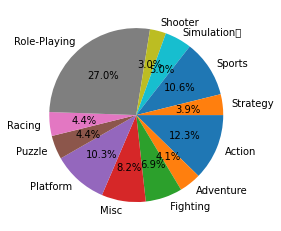

In [236]:
labels = ['Action', 'Adventure',' Fighting', 'Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation	','Sports','Strategy']

colors = sns.color_palette()

plt.pie(Genre_JP,labels=labels, autopct='%.1f%%',startangle=360,counterclock=False)
plt.show()

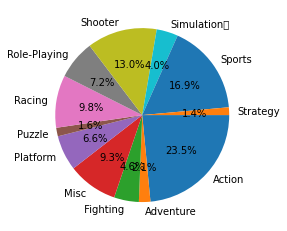

In [237]:
labels = ['Action', 'Adventure',' Fighting', 'Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation	','Sports','Strategy']
colors = sns.color_palette()

plt.pie(Genre_Other,labels=labels, autopct='%.1f%%',startangle=360,counterclock=False)
plt.show()

NA지역 Action,Sports,Shooter<br/>
EU지역 Action,Sports,Shooter<br/>
JP지역 Role-Playing,Action,Sports<br/>
Other지역 Action,Sports,Shooter<br/>
<br/>
JP지역을 제외하곤 결과가 비슷하게 나오는 것을 보면 선호하는 게임이 비슷하다고 할 수 있다.

In [238]:
from matplotlib import rc
rc("font",family="Malgun Gothic")

In [245]:
year_max_sales = vgames.groupby(['Year', 'Genre'])['Sales_sum'].sum().reset_index()
year_sales_bool = year_max_sales.groupby(['Year'])['Sales_sum'].transform(max) == year_max_sales['Sales_sum']
year_max_sales = year_max_sales[year_sales_bool].reset_index(drop=True)
year_max_sales

,Year,Genre,Sales_sum
0,1980.0,Shooter,7.07
1,1981.0,Action,14.79
2,1982.0,Puzzle,10.04
3,1983.0,Platform,6.93
4,1984.0,Shooter,31.10
5,1985.0,Platform,43.17
6,1986.0,Action,13.74
7,1987.0,Fighting,5.42
8,1988.0,Platform,27.73
9,1989.0,Puzzle,37.75


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPytho

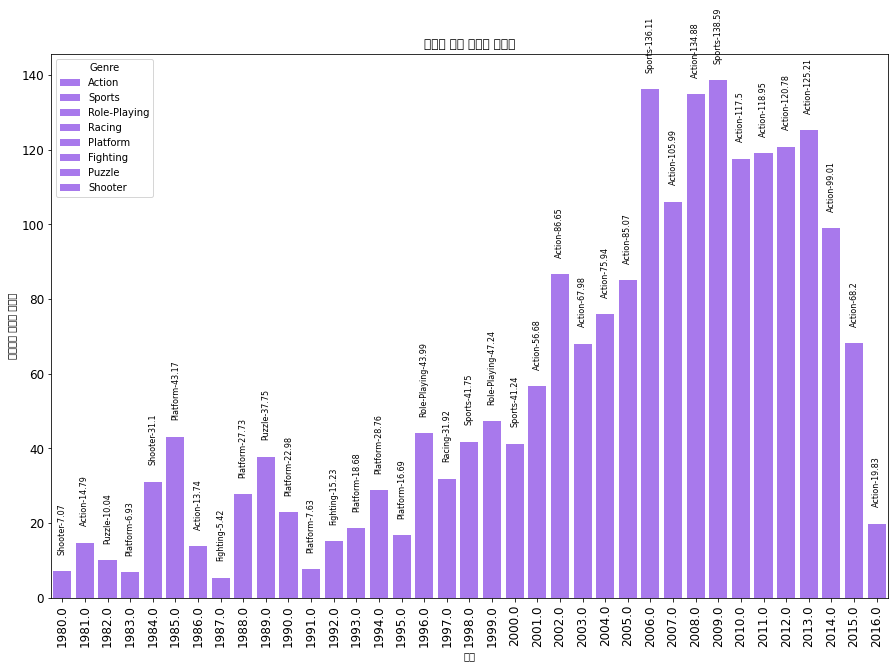

In [258]:
genre = year_max_sales['Genre'].values
plt.figure(figsize=(15,10))
colors = sns.color_palette()
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Action'])
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Sports'])
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Role-Playing'])
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Racing'])
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Platform'])
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Fighting'])
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Puzzle'])
year_barplot = sns.barplot(x='Year', y='Sales_sum',hue='Genre', data=year_max_sales,hue_order=['Shooter'])


cnt = 0
for value in year_max_sales['Sales_sum']:
    year_barplot.text(x=cnt, y=value + 5, s=str(genre[cnt] + '-' + str(round(value,2))),
            color='black', size=8, rotation=90, ha='center')
    cnt+=1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('연도별 수요 트렌드 그래프')
plt.xlabel('연도')
plt.ylabel('최대수요 장르의 매출량')
plt.show()

연도별 Action이 가장 인기 있는 것을 알 수 있다.<br/>
연도별 트렌드가 있는 것은 분명하나 트렌드가 유지되고 있음을 알 수 있다.<br/>
최근 Action 게임이 트렌드를 유지하고 있으나 과거에는 다른 장르의 게임들이 인기가 많았음으로 트렌드가 있다고 볼 수 있다.

In [259]:
best_Sales = vgames[vgames.Year>2000].sort_values(by='Sales_sum' ,ascending=False)
best_Sales = best_Sales.head(10).reset_index(drop=True)
best_Sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_sum
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
5,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
6,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
7,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.43
8,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
9,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


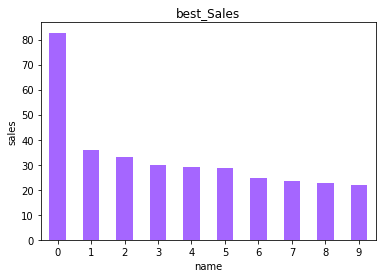

In [261]:
best_Sales['Sales_sum'].plot(kind='bar', rot=0)
plt.title("best_Sales")
plt.xlabel("name")
plt.ylabel("sales")
plt.show()

수요가 많은 게임을 인기가 좋다라고 정의한 뒤 진행하였다.<br/>
닌텐도 게임들의 수요가 좋다.<br/>
결론적으로 닌텐도 게임의 Action 게임을 만드는게 제일 좋아보인다.<br/>